In [1]:
import os
import numpy as np
import pandas as pd

file_path = './test_results_r1.xlsx'

df_raw = pd.read_excel(file_path, engine='openpyxl')
df_raw = df_raw.loc[:, ~df_raw.columns.str.contains("Unnamed:")]

In [25]:
pivot_index = list(df_raw.columns[0:21])   # accuracy 전까지
remove_items = {
    'drift_model', 
    'pruning', 
    'retrain', 
    'Gmax', 
    'Gmin', 
    'G_ratio', 
    'n_rep', 
    'device', 
    'noise_model',
    'dataset',
    'mapping_scaling_omega',
    'model_type',
    }

pivot_index = [item for item in pivot_index if item not in remove_items]
pivot_index

['model',
 'IOparameter',
 'GDC',
 'pgm_noise_scale',
 'read_noise_scale',
 'drift_scale',
 'drift_var',
 'fix_seed',
 'inf_time']

In [50]:
df = df_raw.copy()

In [51]:
df = df[df['model']=='Resnet18']
# df = df[df['retrain'] == 'O']
df = df[df['IOparameter'] == 'non-ideal']
df = df[df['GDC'] == 'off']
df = df[df['pgm_noise_scale'] == 0]
# df = df[df['drift_model'] == 0.01]
df = df[df['Gmin']=='default']
# df = df[df['G_ratio']==25]
df = df[df['fix_seed']=='X']

In [52]:
df['model_type'].unique()

array(['vanilla', '0.3_retrained', '0.4_retrained', '0.5_retrained',
       '0.6_retrained', '0.7_retrained'], dtype=object)

In [29]:
# df

In [ ]:
# df['new_col'] = df['pruning'].astype(str) + '_' + df['retrain'].astype(str) + '_' + df['drift_model'].astype(str)

In [53]:
df_pivot = df.pivot_table(index=pivot_index, columns='model_type', values='accuracy', aggfunc='mean')
df_pivot.reset_index(inplace=True) # index to columns 

In [32]:
# df_pivot

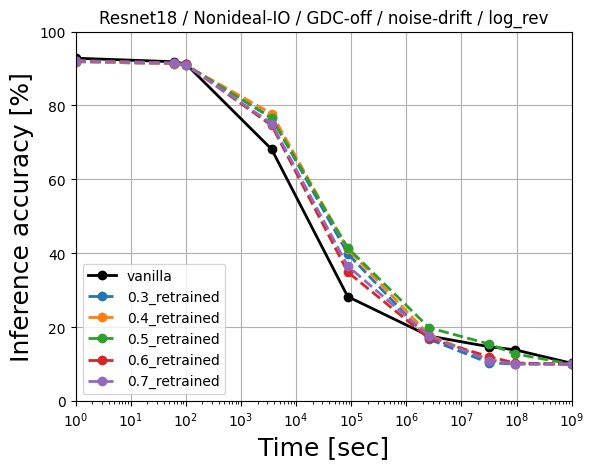

In [54]:
import matplotlib.pyplot as plt

x = df_pivot['inf_time']

plt.grid(True)

plt.plot(x,df_pivot['vanilla'], marker='o', label = 'vanilla', linewidth=2, color='k')

plt.plot(x,df_pivot['0.3_retrained'], marker='o', label = '0.3_retrained', linestyle='--', linewidth=2)
plt.plot(x,df_pivot['0.4_retrained'], marker='o', label = '0.4_retrained', linestyle='--', linewidth=2)
plt.plot(x,df_pivot['0.5_retrained'], marker='o', label = '0.5_retrained', linestyle='--', linewidth=2)
plt.plot(x,df_pivot['0.6_retrained'], marker='o', label = '0.6_retrained', linestyle='--', linewidth=2)
plt.plot(x,df_pivot['0.7_retrained'], marker='o', label = '0.7_retrained', linestyle='--', linewidth=2)


plt.title("Resnet18 / Nonideal-IO / GDC-off / noise-drift / log_rev")
plt.legend(fontsize=10, loc='lower left', bbox_to_anchor=(0.0, 0.0))
plt.xlabel('Time [sec]',fontsize=18)  
plt.ylabel('Inference accuracy [%]', fontsize=18) #, fontweight='demi'
# plt.xticks(fontsize/14)

plt.ylim(0,100)
plt.xlim(1,1000000000)
plt.xscale('log')
plt.show()

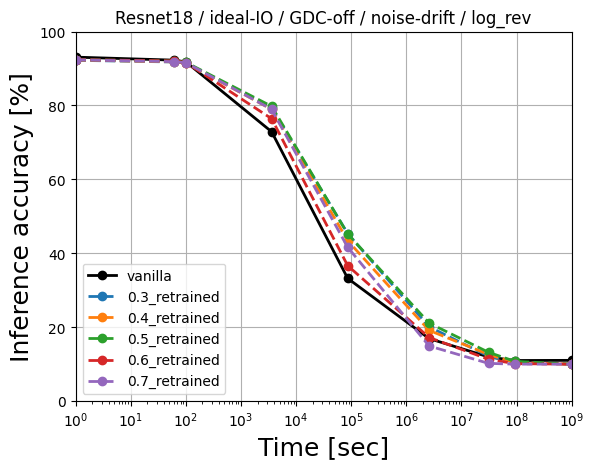

In [49]:
import matplotlib.pyplot as plt

x = df_pivot['inf_time']

plt.grid(True)

plt.plot(x,df_pivot['vanilla'], marker='o', label = 'vanilla', linewidth=2, color='k')

plt.plot(x,df_pivot['0.3_retrained'], marker='o', label = '0.3_retrained', linestyle='--', linewidth=2)
plt.plot(x,df_pivot['0.4_retrained'], marker='o', label = '0.4_retrained', linestyle='--', linewidth=2)
plt.plot(x,df_pivot['0.5_retrained'], marker='o', label = '0.5_retrained', linestyle='--', linewidth=2)
plt.plot(x,df_pivot['0.6_retrained'], marker='o', label = '0.6_retrained', linestyle='--', linewidth=2)
plt.plot(x,df_pivot['0.7_retrained'], marker='o', label = '0.7_retrained', linestyle='--', linewidth=2)


plt.title("Resnet18 / ideal-IO / GDC-off / noise-drift / log_rev")
plt.legend(fontsize=10, loc='lower left', bbox_to_anchor=(0.0, 0.0))
plt.xlabel('Time [sec]',fontsize=18)  
plt.ylabel('Inference accuracy [%]', fontsize=18) #, fontweight='demi'
# plt.xticks(fontsize/14)

plt.ylim(0,100)
plt.xlim(1,1000000000)
plt.xscale('log')
plt.show()

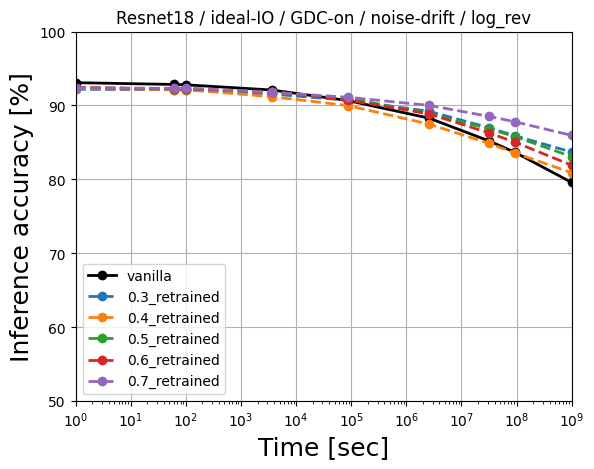

In [ ]:
import matplotlib.pyplot as plt

x = df_pivot['inf_time']

plt.grid(True)

plt.plot(x,df_pivot['vanilla'], marker='o', label = 'vanilla', linewidth=2, color='k')

plt.plot(x,df_pivot['0.3_retrained'], marker='o', label = '0.3_retrained', linestyle='--', linewidth=2)
plt.plot(x,df_pivot['0.4_retrained'], marker='o', label = '0.4_retrained', linestyle='--', linewidth=2)
plt.plot(x,df_pivot['0.5_retrained'], marker='o', label = '0.5_retrained', linestyle='--', linewidth=2)
plt.plot(x,df_pivot['0.6_retrained'], marker='o', label = '0.6_retrained', linestyle='--', linewidth=2)
plt.plot(x,df_pivot['0.7_retrained'], marker='o', label = '0.7_retrained', linestyle='--', linewidth=2)


plt.title("Resnet18 / ideal-IO / GDC-on / noise-drift / log_rev")
plt.legend(fontsize=10, loc='lower left', bbox_to_anchor=(0.0, 0.0))
plt.xlabel('Time [sec]',fontsize=18)  
plt.ylabel('Inference accuracy [%]', fontsize=18) #, fontweight='demi'
# plt.xticks(fontsize/14)

plt.ylim(50,100)
plt.xlim(1,1000000000)
plt.xscale('log')
plt.show()